<a href="https://colab.research.google.com/github/brunoneri/KerasOptimizers/blob/master/keras_optimizer_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install tensorflow==2.0.0


In [0]:

import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt



In [0]:
def plot_diagnostic(history, opt_label):
  train_label='{} train'.format(opt_label)
  val_label= '{} val'.format(opt_label)
  #plot loss  
  plt.figure(figsize=(10,5))
  plt.title('Cross Entropy Loss') 
  plt.xlabel('epoch')
  plt.ylabel('loss') 
  plt.plot(history.history['loss'], color='pink', label= train_label)
  plt.plot(history.history['val_loss'], color='gray', label=val_label)
  plt.legend([train_label,val_label], loc='upper right')
  # plot accuracy
  plt.show()
  plt.figure(figsize=(10,5))
  plt.title('Classification Accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.plot(history.history['accuracy'], color='pink', label=train_label)
  plt.plot(history.history['val_accuracy'], color='gray', label=val_label)
  plt.legend([train_label,val_label], loc='lower right')
  plt.show()

Caricamento del dataset Fashion MINST  

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train= x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


Preparazione dei training e validation set.

In [16]:

(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)


y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)


print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


Implementazione del modello di Convolutional neural network

In [17]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

Trainin della CNN con l'utilizzo dell'ottimizzatore SGD

In [0]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.001),
              metrics=["accuracy"])


In [19]:
history_sgd = model.fit(x_train, y_train, epochs=10,batch_size=64,
                    validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 79s 1ms/sample - loss: 2.2660 - accuracy: 0.1528 - val_loss: 2.2002 - val_accuracy: 0.3628
Epoch 2/10
55000/55000 [==============================] - 79s 1ms/sample - loss: 2.0501 - accuracy: 0.2872 - val_loss: 1.7805 - val_accuracy: 0.5460
Epoch 3/10
55000/55000 [==============================] - 79s 1ms/sample - loss: 1.6004 - accuracy: 0.4140 - val_loss: 1.2416 - val_accuracy: 0.6064
Epoch 4/10
55000/55000 [==============================] - 79s 1ms/sample - loss: 1.3230 - accuracy: 0.4853 - val_loss: 1.0459 - val_accuracy: 0.6238
Epoch 5/10
55000/55000 [==============================] - 79s 1ms/sample - loss: 1.1873 - accuracy: 0.5333 - val_loss: 0.9594 - val_accuracy: 0.6342
Epoch 6/10
55000/55000 [==============================] - 78s 1ms/sample - loss: 1.1098 - accuracy: 0.5602 - val_loss: 0.9073 - val_accuracy: 0.6528
Epoch 7/10
55000/55000 [==============================] -

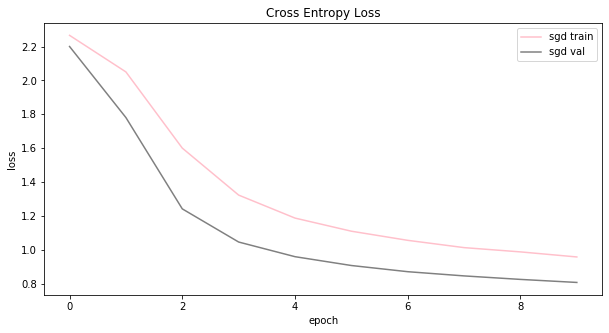

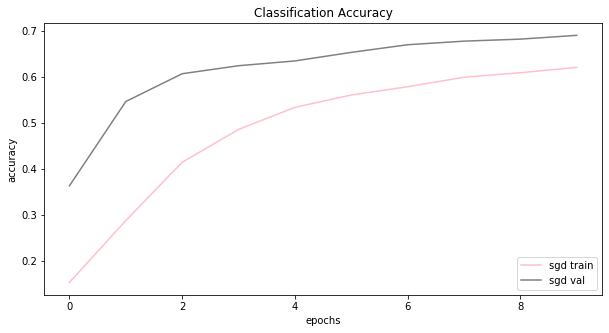

In [20]:
plot_diagnostic(history_sgd,"sgd")

Trainin della CNN con l'utilizzo dell'ottimizzatore SGD e dele momentum

In [0]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9),
              metrics=["accuracy"])

In [22]:
history_momentum = model.fit(x_train, y_train, epochs=10,batch_size=64,
                    validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 80s 1ms/sample - loss: 0.8804 - accuracy: 0.6551 - val_loss: 0.7148 - val_accuracy: 0.7308
Epoch 2/10
55000/55000 [==============================] - 80s 1ms/sample - loss: 0.7966 - accuracy: 0.6909 - val_loss: 0.6557 - val_accuracy: 0.7618
Epoch 3/10
55000/55000 [==============================] - 80s 1ms/sample - loss: 0.7361 - accuracy: 0.7163 - val_loss: 0.6093 - val_accuracy: 0.7810
Epoch 4/10
55000/55000 [==============================] - 79s 1ms/sample - loss: 0.6987 - accuracy: 0.7312 - val_loss: 0.5719 - val_accuracy: 0.7904
Epoch 5/10
55000/55000 [==============================] - 79s 1ms/sample - loss: 0.6636 - accuracy: 0.7456 - val_loss: 0.5624 - val_accuracy: 0.7980
Epoch 6/10
55000/55000 [==============================] - 79s 1ms/sample - loss: 0.6368 - accuracy: 0.7559 - val_loss: 0.5257 - val_accuracy: 0.8100
Epoch 7/10
55000/55000 [==============================] -

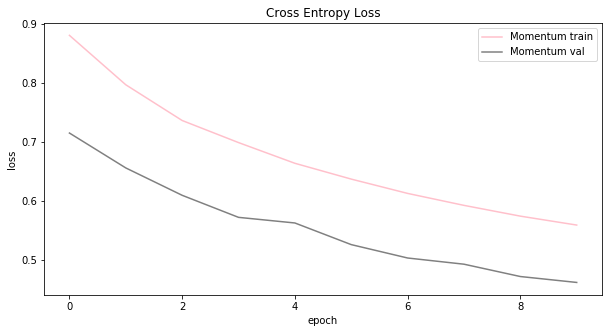

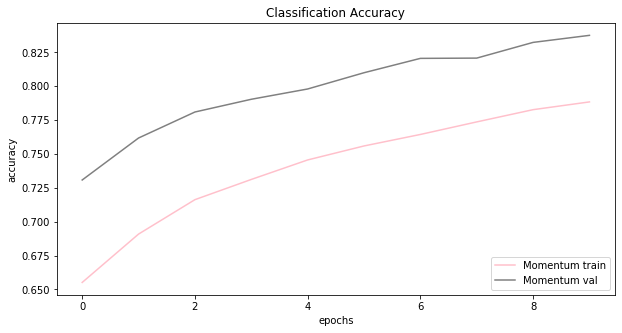

In [23]:
plot_diagnostic(history_momentum,"Momentum")

Trainin della CNN con l'utilizzo dell'ottimizzatore SGD ed il momento di 
Nesterov


In [0]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True),
              metrics=["accuracy"])


In [25]:
history_momentum_nesterov = model.fit(x_train, y_train, epochs=10,batch_size=64,
                    validation_data=(x_valid, y_valid))


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 79s 1ms/sample - loss: 0.5334 - accuracy: 0.8002 - val_loss: 0.4402 - val_accuracy: 0.8438
Epoch 2/10
55000/55000 [==============================] - 78s 1ms/sample - loss: 0.5250 - accuracy: 0.8019 - val_loss: 0.4376 - val_accuracy: 0.8472
Epoch 3/10
55000/55000 [==============================] - 78s 1ms/sample - loss: 0.5147 - accuracy: 0.8074 - val_loss: 0.4225 - val_accuracy: 0.8544
Epoch 4/10
55000/55000 [==============================] - 78s 1ms/sample - loss: 0.5043 - accuracy: 0.8133 - val_loss: 0.4163 - val_accuracy: 0.8518
Epoch 5/10
55000/55000 [==============================] - 79s 1ms/sample - loss: 0.4932 - accuracy: 0.8167 - val_loss: 0.4081 - val_accuracy: 0.8560
Epoch 6/10
55000/55000 [==============================] - 78s 1ms/sample - loss: 0.4839 - accuracy: 0.8204 - val_loss: 0.3983 - val_accuracy: 0.8614
Epoch 7/10
55000/55000 [==============================] -

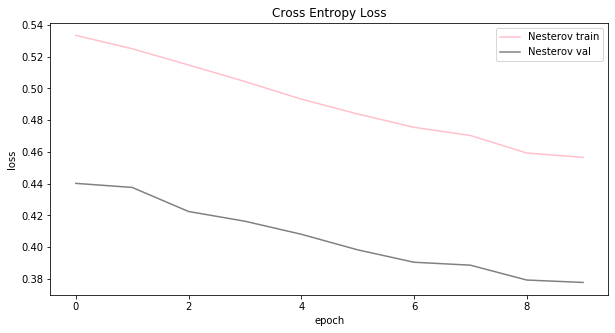

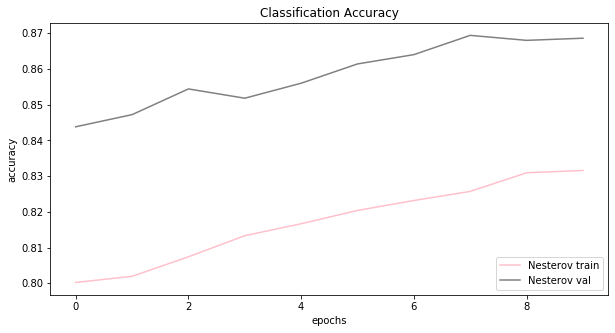

In [26]:
plot_diagnostic(history_momentum_nesterov,"Nesterov")

Trainin della CNN con l'utilizzo dell'ottimizzatore RMSProp 

In [0]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.9),
              metrics=["accuracy"])


In [28]:
history_rmsprop = model.fit(x_train, y_train, epochs=10,batch_size=64,
                    validation_data=(x_valid, y_valid))


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 81s 1ms/sample - loss: 0.4735 - accuracy: 0.8303 - val_loss: 0.3534 - val_accuracy: 0.8756
Epoch 2/10
55000/55000 [==============================] - 80s 1ms/sample - loss: 0.3897 - accuracy: 0.8607 - val_loss: 0.3129 - val_accuracy: 0.8908
Epoch 3/10
55000/55000 [==============================] - 80s 1ms/sample - loss: 0.3499 - accuracy: 0.8759 - val_loss: 0.3083 - val_accuracy: 0.8908
Epoch 4/10
55000/55000 [==============================] - 80s 1ms/sample - loss: 0.3328 - accuracy: 0.8823 - val_loss: 0.2681 - val_accuracy: 0.9058
Epoch 5/10
55000/55000 [==============================] - 79s 1ms/sample - loss: 0.3217 - accuracy: 0.8861 - val_loss: 0.3118 - val_accuracy: 0.8942
Epoch 6/10
55000/55000 [==============================] - 79s 1ms/sample - loss: 0.3134 - accuracy: 0.8897 - val_loss: 0.2878 - val_accuracy: 0.8980
Epoch 7/10
55000/55000 [==============================] -

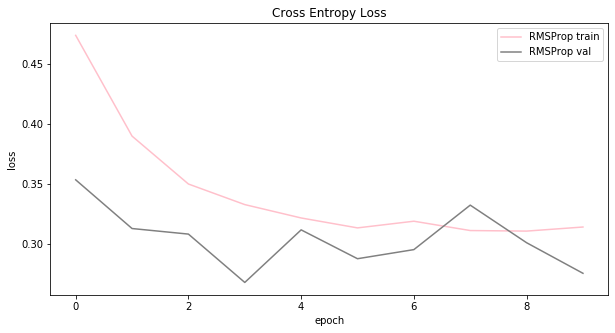

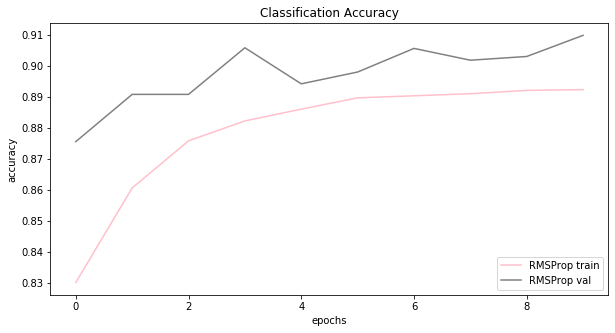

In [29]:
plot_diagnostic(history_rmsprop,"RMSProp")

Trainin della CNN con l'utilizzo dell'ottimizzatore Adam

In [0]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])


In [31]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

history_adam = model.fit(x_train, y_train, epochs=10,batch_size=64,
                    validation_data=(x_valid, y_valid), callbacks=[checkpointer])


Using TensorFlow backend.


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.2984 - accuracy: 0.8962
Epoch 00001: val_loss improved from inf to 0.25404, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 78s 1ms/sample - loss: 0.2983 - accuracy: 0.8963 - val_loss: 0.2540 - val_accuracy: 0.9124
Epoch 2/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.2791 - accuracy: 0.9018
Epoch 00002: val_loss improved from 0.25404 to 0.24049, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 76s 1ms/sample - loss: 0.2790 - accuracy: 0.9018 - val_loss: 0.2405 - val_accuracy: 0.9176
Epoch 3/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.2645 - accuracy: 0.9068
Epoch 00003: val_loss improved from 0.24049 to 0.22996, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 77s 1ms/sample - loss: 0.2645 - accuracy: 0.

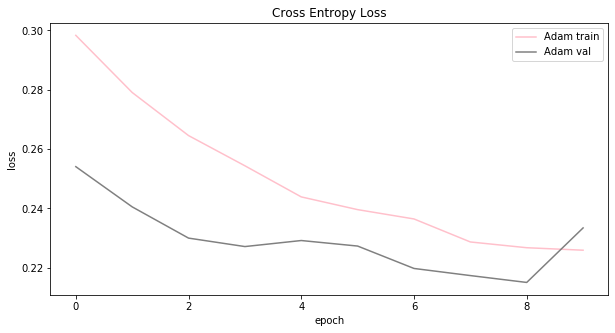

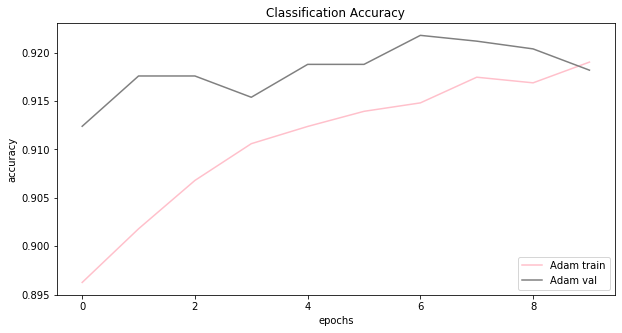

In [32]:
plot_diagnostic(history_adam,"Adam")

Visualizzazione delle curve di apprendimento (loss e accuracy)

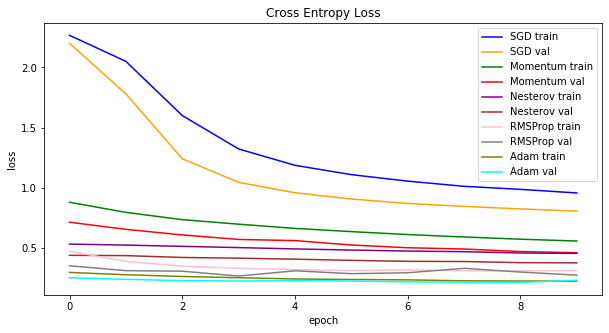

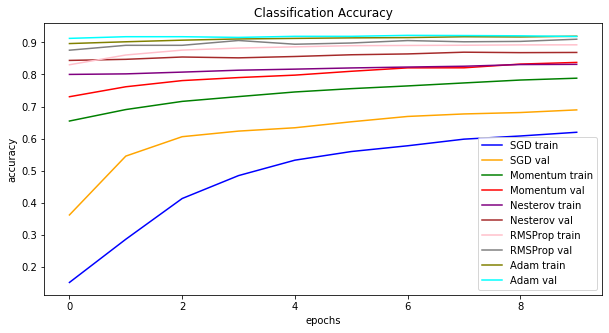

In [33]:
# plot learning curves
plt.figure(figsize=(10,5))
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(history_sgd.history['loss'], color='blue', label='SGD train')
plt.plot(history_sgd.history['val_loss'], color='orange', label='SGD val')
plt.plot(history_momentum.history['loss'], color='green', label='Momentum train')
plt.plot(history_momentum.history['val_loss'], color='red', label='Momentum val')
plt.plot(history_momentum_nesterov.history['loss'], color='purple', label='Nesterov train')
plt.plot(history_momentum_nesterov.history['val_loss'], color='brown', label='Nesterov val')
plt.plot(history_rmsprop.history['loss'], color='pink', label='RMSProp train')
plt.plot(history_rmsprop.history['val_loss'], color='gray', label='RMSProp val')
plt.plot(history_adam.history['loss'], color='olive', label='Adam train')
plt.plot(history_adam.history['val_loss'], color='cyan', label='Adam val')
plt.legend(['SGD train', 'SGD val','Momentum train','Momentum val','Nesterov train', 'Nesterov val','RMSProp train','RMSProp val','Adam train', 'Adam val'], loc='upper right')
# plot accuracy
plt.show()
plt.figure(figsize=(10,5))
plt.title('Classification Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history_sgd.history['accuracy'], color='blue', label='SGD train')
plt.plot(history_sgd.history['val_accuracy'], color='orange', label='SGD val')
plt.plot(history_momentum.history['accuracy'], color='green', label='Momentum train')
plt.plot(history_momentum.history['val_accuracy'], color='red', label='Momentum val')
plt.plot(history_momentum_nesterov.history['accuracy'], color='purple', label='Nesterov train')
plt.plot(history_momentum_nesterov.history['val_accuracy'], color='brown', label='Nesterov val')
plt.plot(history_rmsprop.history['accuracy'], color='pink', label='RMSProp train')
plt.plot(history_rmsprop.history['val_accuracy'], color='gray', label='RMSProp val')
plt.plot(history_adam.history['accuracy'], color='olive', label='Adam train')
plt.plot(history_adam.history['val_accuracy'], color='cyan', label='Adam val')
plt.legend(['SGD train', 'SGD val','Momentum train','Momentum val','Nesterov train', 'Nesterov val','RMSProp train','RMSProp val','Adam train', 'Adam val'], loc='lower right')
plt.show()

Valutazione del modello mediante il test set. 

In [0]:

model.load_weights('model.weights.best.hdf5')

In [35]:
# Valutazione del modello con il test set
score = model.evaluate(x_test, y_test, verbose=0)

print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9171


In [0]:
# Etichette del dataset
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9


y_hat = model.predict(x_test)

# Visualizzazine di 10 immagini campione del dataset di test con il relativo risultato della classificione
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
  
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))